In [23]:
#Setup
import pandas as pd  
import seaborn as sns
happiness2015 = pd.read_csv("wh_2015.csv")
happiness2016 = pd.read_csv("wh_2016.csv")
happiness2017 = pd.read_csv("wh_2017.csv")

happiness2015 = pd.read_csv("wh_2015.csv")
happiness2016 = pd.read_csv("wh_2016.csv")
happiness2017 = pd.read_csv("wh_2017.csv")

#Confirming # of rows is the same in each data set
shape_2015 = happiness2015.shape
shape_2016 = happiness2016.shape 
shape_2017 = happiness2017.shape


#Example of specifying data to mark as Nan
moto = pd.read_csv("test.csv", na_values=['none'])

FileNotFoundError: [Errno 2] File b'test.csv' does not exist: b'test.csv'

In [24]:
#Identifying missing vals
#Rows - 
missing = happiness2015['Happiness Score'].isnull()
#Summary 
missing_2015 =happiness2015.isnull().sum()
missing_2016 = happiness2016.isnull().sum()
missing_2017 = happiness2017.isnull().sum()


In [25]:
#Correcting Data cleaning errors that result in Missing Vals
happiness2017.columns = happiness2017.columns.str.replace('.', ' ').str.replace('\s+', ' ').str.strip().str.upper()

#Replace . with a space, replace consecutive whitespace with ' ', remove brackets, all uppercase 
happiness2015.columns = happiness2015.columns.str.replace('.', ' ').str.replace('\s+', ' ').str.replace('(', '').str.replace(')', '').str.strip().str.upper()
happiness2016.columns = happiness2016.columns.str.replace('.', ' ').str.replace('\s+', ' ').str.replace('(', '').str.replace(')', '').str.strip().str.upper()

#Merge and reset index values in resulting DF
combined = pd.concat([happiness2015, happiness2016, happiness2017], ignore_index=True)
missing = combined.isnull().sum()
combined

,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,LOWER CONFIDENCE INTERVAL,REGION,STANDARD ERROR,TRUST GOVERNMENT CORRUPTION,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,YEAR
0,Switzerland,2.51738,1.39651,1.34951,0.66557,0.29678,1.0,7.587,0.94143,NaN,Western Europe,0.03411,0.41978,NaN,NaN,NaN,2015
1,Iceland,2.70201,1.30232,1.40223,0.62877,0.43630,2.0,7.561,0.94784,NaN,Western Europe,0.04884,0.14145,NaN,NaN,NaN,2015
2,Denmark,2.49204,1.32548,1.36058,0.64938,0.34139,3.0,7.527,0.87464,NaN,Western Europe,0.03328,0.48357,NaN,NaN,NaN,2015
3,Norway,2.46531,1.45900,1.33095,0.66973,0.34699,4.0,7.522,0.88521,NaN,Western Europe,0.03880,0.36503,NaN,NaN,NaN,2015
4,Canada,2.45176,1.32629,1.32261,0.63297,0.45811,5.0,7.427,0.90563,NaN,North America,0.03553,0.32957,NaN,NaN,NaN,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
488,Somaliland Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
489,Somaliland region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
490,Suriname,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017


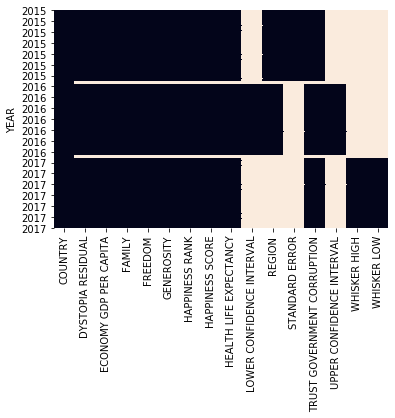

In [26]:
#Visualizing missing data through a heatmap
combined_updated = combined.set_index('YEAR')
sns.heatmap(combined_updated.isnull(), cbar=False)

#Confirm that region col is missing from 2017
#Selected rows from combined where YEAR col == 2017, and only the REGION column
regions_2017 = combined[combined['YEAR'] == 2017]['REGION']
missing = regions_2017.isnull().sum()


In [27]:
#Using data from additional sources to fill in missing vals
#Merge to assign REGION in regions df to corresponding country in combined, how=left so no rows dropped from combined
combined = pd.merge(left=combined, right=regions, on='COUNTRY', how='left')

#drop 'Region_x' as it will have missing values, Region_y stays.
combined = combined.drop('REGION_x', axis=1)
missing = combined.isnull().sum()


NameError: name 'regions' is not defined

In [28]:
#Checking for duplicate values
#Convert all strings in COUNTRY to upper case bc .duplicated() matches exact values
combined['COUNTRY'] = combined['COUNTRY'].str.upper()

#Will check for only rows with same country and year as duplicates
dups = combined.duplicated(['COUNTRY', 'YEAR'])
combined[dups]

,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,LOWER CONFIDENCE INTERVAL,REGION,STANDARD ERROR,TRUST GOVERNMENT CORRUPTION,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,YEAR
162,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
326,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016
489,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017


In [29]:
#Cprrecting duplicate vals with df.drop_duplicates()
combined['COUNTRY'] = combined['COUNTRY'].str.upper()

#drop first row since 2nd contains more missing vals
combined = combined.drop_duplicates(['COUNTRY', 'YEAR'])

In [30]:
#Handling missing values by dropping columns
combined.isnull().sum()
#Missing vals make up more than half the following columns
columns_to_drop = ['LOWER CONFIDENCE INTERVAL', 'STANDARD ERROR', 'UPPER CONFIDENCE INTERVAL', 'WHISKER HIGH', 'WHISKER LOW']

combined = combined.drop(columns_to_drop, axis=1)
missing =combined.isnull().sum()

In [31]:
#missing values by dropping columns with parameter thresh
#df.dropna(axis=1) Will drop columns instead of rows

#Confirms num of values that ARE NOT missing in each column
#combined.notnull().sum().sort_values() 
#drops any col with less than 159 real values
combined = combined.dropna(thresh=159, axis=1)
missing = combined.isnull().sum()


In [33]:
#Handling missing data with imputation and series.fillna()
happiness_mean = combined['HAPPINESS SCORE'].mean()#take mean of happiness score col
print(happiness_mean)

#create new col with all missing vals in happiness score replaced with mean 
combined['HAPPINESS SCORE UPDATED'] = combined['HAPPINESS SCORE'].fillna(happiness_mean)
print(combined['HAPPINESS SCORE UPDATED'].mean())

5.370727659882893
5.370727659882894


In [34]:
#Dropping rows, filling in missing data accurately based on means of similar data
#View happiness score by region
combined.pivot_table(index='REGION', values='HAPPINESS SCORE', margins=True)

#check for new rows with missing vals
#assign missing vals 
combined = combined.dropna()
missing = combined.isnull().sum()

#as means for the dropped regions were lower than global mean, concluded it was better to drop them rather than replace missing vals with mean.

,HAPPINESS SCORE
REGION,
Australia and New Zealand,7.304250
Central and Eastern Europe,5.351810
Eastern Asia,5.625167
Latin America and Caribbean,6.122283
Middle East and Northern Africa,5.396744
North America,7.263500
Southeastern Asia,5.328167
Southern Asia,4.572071
Sub-Saharan Africa,4.170462
